In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC, SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy.stats import reciprocal, uniform
from sklearn.metrics import roc_auc_score


In [3]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, cache=True, as_frame=False)

# We get the information from reading the documentation
X = mnist["data"]
y = mnist["target"].astype(np.uint8)

c:\Users\olofs\anaconda3\envs\machine_learning\lib\site-packages\sklearn\datasets\_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [4]:
# Identify all keywords that contain information about the datset
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [5]:
print(mnist.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [6]:
mnist.details

{'id': '554',
 'name': 'mnist_784',
 'version': '1',
 'description_version': '1',
 'format': 'ARFF',
 'creator': ['Yann LeCun', 'Corinna Cortes', 'Christopher J.C. Burges'],
 'upload_date': '2014-09-29T03:28:38',
 'language': 'English',
 'licence': 'Public',
 'url': 'https://api.openml.org/data/v1/download/52667/mnist_784.arff',
 'parquet_url': 'http://openml1.win.tue.nl/dataset554/dataset_554.pq',
 'file_id': '52667',
 'default_target_attribute': 'class',
 'tag': ['AzurePilot',
  'OpenML-CC18',
  'OpenML100',
  'study_1',
  'study_123',
  'study_41',
  'study_99',
  'vision'],
 'visibility': 'public',
 'minio_url': 'http://openml1.win.tue.nl/dataset554/dataset_554.pq',
 'status': 'active',
 'processing_date': '2020-11-20 20:12:09',
 'md5_checksum': '0298d579eb1b86163de7723944c7e495'}

In [7]:
print(X.shape)
print(y.shape)


(70000, 784)
(70000,)


In [8]:
# What is the first observation?
y[0]

5

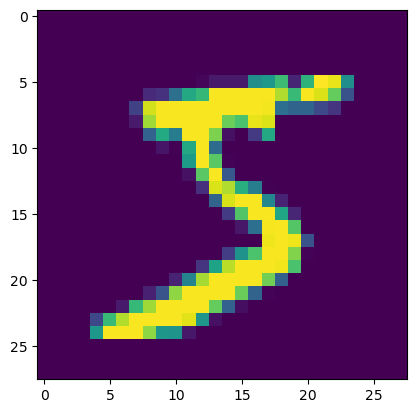

In [9]:
# Chose the first observation that we now know is 5 
# Reshape into dimensions 28x28
# usel matplotlib.pyplot to plot the image

first_obs = X[0]
first_obs_image = first_obs.reshape(28, 28)
plt.imshow(first_obs_image)

In [10]:
# Split the data into smaller train and test sets
# Don't use all data, we just want to get a quick glimpse of what works best.
# Once we have identified the best model, we can evaluate it on the full dataset
# This saves time and processing power

X_train, X_test = X[:6000], X[6000:7000]
y_train, y_test = y[:6000], y[6000:7000]

In [11]:
# See the shapes of the arrays

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6000, 784)
(1000, 784)
(6000,)
(1000,)


In [12]:
# Put the scaler in the pipeline just for practice

scaler_pipe = Pipeline ([('scaler', StandardScaler())])

# Fit_transform the training data
X_train_trans = scaler_pipe.fit_transform(X_train)

In [13]:
# Instanciate two models
lin_svc = LinearSVC(random_state=10)
svc = SVC(random_state=10)

# Train the model on the models
lin_svc.fit(X_train_trans, y_train)
svc.fit(X_train_trans, y_train)

c:\Users\olofs\anaconda3\envs\machine_learning\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


SVC(random_state=10)

In [14]:
# Transform the test data (Do not fit!!!)

X_test_trans = scaler_pipe.transform(X_test)

In [15]:
# Make predictions on the test data in both models

ypred_lin = lin_svc.predict(X_test_trans)
ypred_svc = svc.predict(X_test_trans)

In [16]:
print(f"Linear Reg: {accuracy_score(y_test, ypred_lin)}")
print(f"SVC: {accuracy_score(y_test, ypred_svc)}")

# Looks like the SVC is much better. Move on with that one!
score_linreg = accuracy_score(y_test, ypred_lin)
score_svc = accuracy_score(y_test, ypred_svc)

Linear Reg: 0.847
SVC: 0.92


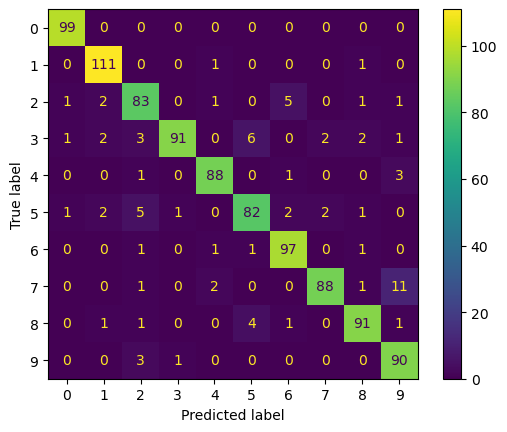

In [33]:
ConfusionMatrixDisplay(confusion_matrix(y_test, ypred_svc)).plot()

In [155]:
missclassified = np.where((y_test == 8) & (y_test != ypred_svc) & (ypred_svc== 6))
missclassified

(array([604], dtype=int64),)

In [156]:
for i in missclassified:
        for x in i:
                print(x)
                print(type(x))

604
<class 'numpy.int64'>


1
604


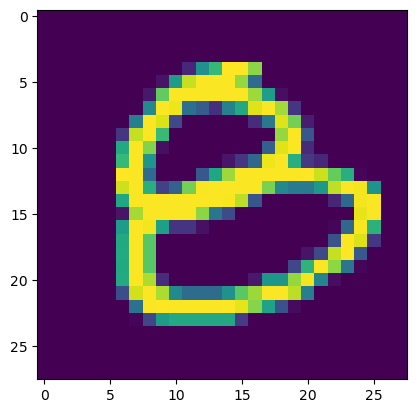

In [159]:
for i in missclassified:
    list_of_misses = []
    for x in i:
        list_of_misses.append(x)

print(len(list_of_misses))
print(list_of_misses[0])


In [144]:
print(y_test[2])

1


In [185]:
def display_missed_predictions(model, true_y, predicted_y):
    missclassified = np.where((y_test == true_y) & (y_test != model) & (model== predicted_y))
    for i in missclassified:
        list_of_misses = []
        for x in i:
            list_of_misses.append(x)
    if len(list_of_misses) == 0:
        return print("No missclassifications in this combination.")
        pass
    elif len(list_of_misses) == 1:
        missed = list_of_misses[0]
        pic = X_test[missed].reshape(28, 28)
        plt.imshow(pic)
        return 
    elif len(list_of_misses) % 2 == 0 and len(list_of_misses) != 1:
        tl = int(len(list_of_misses) / 2)
    else:
        tl = int((len(list_of_misses) + 1) / 2)
    numplots = 1
    for i in list_of_misses:
        pic = X_test[i].reshape(28, 28)
        plt.subplot(tl, tl, numplots)
        plt.imshow(pic)
        numplots += 1

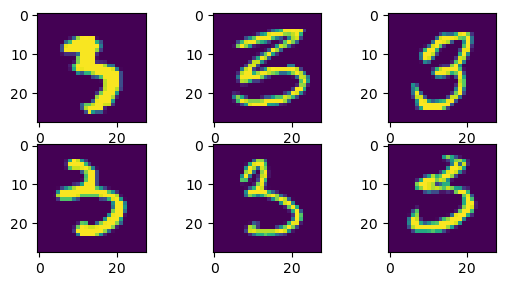

In [188]:
display_missed_predictions(ypred_svc, 3, 5)

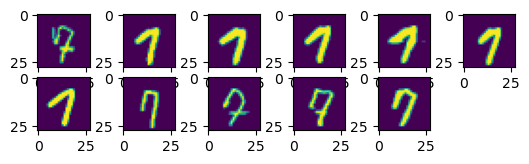

In [24]:
# Time to make a gridsearch to tune the hyper parameters from SVC
# Let's start with a random search
# hyper_param is a dict {} that contains keys and words separated by :
# Key 'gamma' searches the range (0.001, 1) in a reciprocal manner ie. emphasizes the smaller numbers
# Key 'C' searches the values (0.1, 1) in a uniform distribution
# To see distributions: https://docs.scipy.org/doc/scipy/reference/stats.html

# hyper_param = {'gamma': reciprocal(0.001, 0.1), 'C': uniform(0.1, 1)}

# rand_search = RandomizedSearchCV(svc, hyper_param, cv=4)

# rand_search.fit(X_train_trans, y_train)

In [25]:
#  Show the results from each cv
# 0.9086
# pd.DataFrame(rand_search.cv_results_)

In [26]:
# Best gamma is super low and best C relativelly high.
# Try again, with a smaller range in gamma

# rand_search.best_params_

In [27]:
# # Make predictions
# ypred_random = rand_search.predict(X_test_trans)

In [28]:
# confusion_matrix(y_test, ypred_random)

In [29]:
# Prediction accuracy 0.914, slightly better that results from the cv above! (0.908)

# accuracy_score(y_test, ypred_random)

In [30]:
# Train a new model on lower gamma

svc = SVC(random_state=42)

hyper_param2 = {'gamma': reciprocal(0.0001, 0.5), 'C': uniform(0.1, 1)}

rand_search2 = RandomizedSearchCV(svc, hyper_param2, cv=4)

rand_search2.fit(X_train_trans, y_train)

KeyboardInterrupt: 

In [ ]:
#  Show the results from each cv
# 0.9172, not bad, but not sinificantly  than 0.9086 above
pd.DataFrame(rand_search2.cv_results_)
# 0.9172 accuracy with gamma 0.0012. It was the lowes number tested, what if we set the range even lower?
# C was pretty high on the best results as well, maye try with higher C?

NameError: name 'pd' is not defined

In [ ]:
# Get test score.
# 0.924, again slightly better that the cv-tests

rand_search2.best_params_
ypred_random2 = rand_search2.predict(X_test_trans)
accuracy_score(y_test, ypred_random2)

0.908

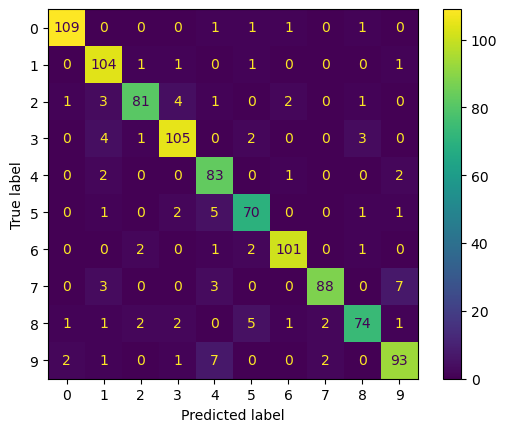

In [ ]:
ConfusionMatrixDisplay(confusion_matrix(y_test, ypred_random2)).plot()

In [ ]:
# Find indeces of images that were classified as 3 but were in fact 2
missclassified = np.where((y_test == 2) & (y_test != ypred_random2) & (ypred_random2 == 3))
missclassified


(array([ 13, 129, 162, 545], dtype=int64),)

In [ ]:
# Print the labels of the indeces
print(y_test[13], y_test[129], y_test[162], y_test[545])

2 2 2 2


In [ ]:
# Add the reshaped data into a list
# I tried to find a way to print all in a loop, but cannot understand subplots
for i in missclassified:
    numb = len(missclassified) / 2
    numplots = 1
    for x in i:
        pic = plt.subplot(numb, numb, numplots)
        plt.imshow(pic)
        numplots += 1
        


NameError: name 'missclassified' is not defined

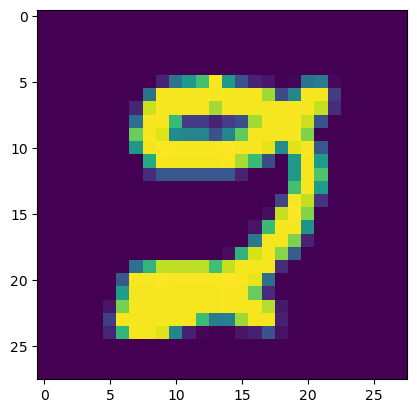

In [ ]:
img = ilist[0].reshape(28, 28)
plt.imshow(img)

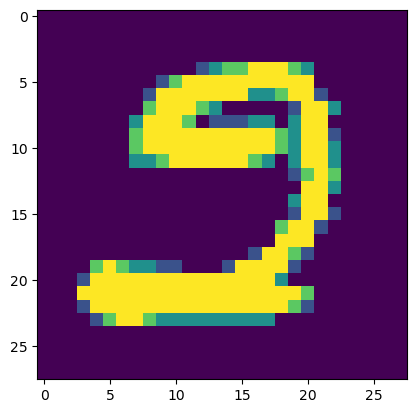

In [ ]:
img = ilist[1].reshape(28, 28)
plt.imshow(img)

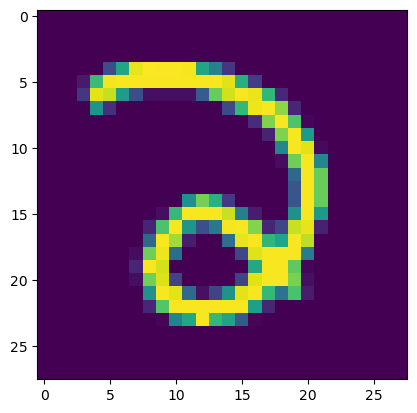

In [ ]:
img = ilist[2].reshape(28, 28)
plt.imshow(img)

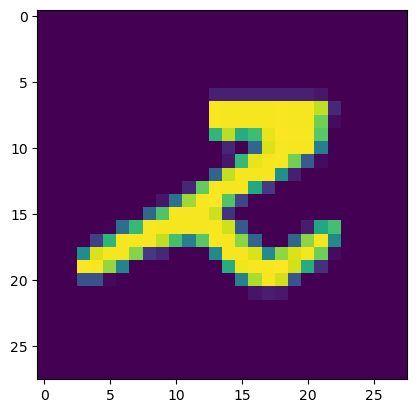

In [ ]:
img = ilist[3].reshape(28, 28)
plt.imshow(img)

In [ ]:
# hyper_param3 = {'kernel': ['poly'], 'gamma': reciprocal(0.0001, 0.5), 'C': uniform(0.1, 1)}

# rand_search3 = RandomizedSearchCV(svc, hyper_param3, cv=4)

# rand_search3.fit(X_train_trans, y_train)

RandomizedSearchCV(cv=4, estimator=SVC(random_state=10),
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001F1E62CE370>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001F1E6349F70>,
                                        'kernel': ['poly']})

In [ ]:
# Result were not special with the poly kernel instead
pd.DataFrame(rand_search3.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,5.591738,0.229343,1.064076,0.055720,0.622554,0.004066,poly,"{'C': 0.6225535680397677, 'gamma': 0.004065995...",0.9032,0.9384,0.9424,0.9352,0.9298,0.015568,6
1,6.586632,0.725544,1.229640,0.084197,0.9445,0.017414,poly,"{'C': 0.9444999134784771, 'gamma': 0.017413956...",0.9112,0.9392,0.9456,0.9392,0.9338,0.013307,1
2,5.535013,0.485807,1.035379,0.011365,0.354718,0.037662,poly,"{'C': 0.3547184858928951, 'gamma': 0.037662022...",0.9112,0.9392,0.9456,0.9392,0.9338,0.013307,1
3,10.644401,0.034595,1.754333,0.013070,0.438359,0.000588,poly,"{'C': 0.4383590521577725, 'gamma': 0.000587570...",0.1664,0.1664,0.1688,0.1792,0.1702,0.005288,8
4,10.922294,0.043610,1.782534,0.012887,1.074101,0.00016,poly,"{'C': 1.074101220301603, 'gamma': 0.0001604263...",0.1128,0.1128,0.1128,0.1120,0.1126,0.000346,10
5,6.047106,0.056057,1.208918,0.014679,0.248763,0.002918,poly,"{'C': 0.24876349930669475, 'gamma': 0.00291759...",0.8464,0.8664,0.8936,0.8720,0.8696,0.016810,7
6,5.178630,0.018126,1.042303,0.022334,0.729099,0.37248,poly,"{'C': 0.7290991428795963, 'gamma': 0.372479572...",0.9112,0.9392,0.9456,0.9392,0.9338,0.013307,1
7,5.170523,0.058534,1.035281,0.014723,0.195139,0.340561,poly,"{'C': 0.1951394807889905, 'gamma': 0.340560824...",0.9112,0.9392,0.9456,0.9392,0.9338,0.013307,1
8,10.627146,0.085001,1.747957,0.006753,0.894631,0.000433,poly,"{'C': 0.8946313419142622, 'gamma': 0.000432947...",0.1544,0.1576,0.1568,0.1640,0.1582,0.003550,9
9,5.186432,0.065295,1.043936,0.014006,0.408961,0.006036,poly,"{'C': 0.4089609412458607, 'gamma': 0.006036106...",0.9104,0.9384,0.9456,0.9368,0.9328,0.013351,5


In [ ]:
# Accuracy of 0.908, nothing special
rand_search3.best_params_
ypred_random3 = rand_search3.predict(X_test_trans)
accuracy_score(y_test, ypred_random2)

0.908